In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [39]:
def vector_angle(unit_vector_1, unit_vector_2):
    unit_vector_1 = vector_1 / np.linalg.norm(vector_1)
    unit_vector_2 = vector_2 / np.linalg.norm(vector_2)
    dot_product = np.dot(unit_vector_1, unit_vector_2)
    return np.arccos(dot_product)

In [74]:
plt.ioff()

def vec(x, y):
    return np.array([float(x), float(y)])

def polygon(n, radius, rotate=0):
    points = []
    angle_size = 2 * math.pi / n
    for i in range(n):
        angle = angle_size * i + math.radians(rotate)
        points.append(vec(radius * math.cos(angle), radius * math.sin(angle)))
    return np.array(points)

def draw_vector(start, end, c):
    plt.arrow(start[0], start[1], (end[0]-start[0]), (end[1]-start[1]), fc=c, ec=c,
        head_width=0.2, head_length=0.2,length_includes_head=True)

def draw_line(p1, p2, c):
    plt.plot([p1[0],p2[0]],[p1[1],p2[1]],c+'o-')

def draw_point(loc, c):
    plt.plot(loc[0], loc[1], c + '.')

def draw_polygon(points, c, lines=True):
    if lines:
        for i in range(len(points)-1):
            draw_line(points[i], points[i+1], c)
        draw_line(points[0], points[-1], c)
    else:
        for point in points:
            draw_point(point, c)

class Plot:
    def __init__(self, name=None):
        if name:
            self.fname = name + '.svg'
        else:
            self.fname = None

    def __enter__(self):
        plt.figure(figsize=(8,8))
    def __exit__(self, type, value, traceback):
        plt.axis((-5,5,-5,5))
        plt.gca().axes.get_yaxis().set_visible(False)
        plt.gca().axes.get_xaxis().set_visible(False)
        plt.gca().axis('off')
        plt.gca().set_aspect('equal', adjustable='box')
        if self.fname:
            plt.savefig(self.fname)
        plt.show()
        
ORIGIN = vec(0, 0)

In [75]:
def perpendicularCCW(vector):
    return vec(-vector[1], vector[0])

def swerve(module, v, omega, draw=None):
    translation_component = v
    rotation_component = omega * perpendicularCCW(module)
    output = translation_component + rotation_component
    if draw:
        if 'all' == draw or 't' in draw:
            draw_vector(module, module+translation_component, 'b')
        if 'all' == draw or 'r' in draw:
            draw_vector(module, module+rotation_component, 'r')
        if 'all' == draw or 'o' in draw:
            draw_vector(module, module+output, 'g')
    return output

In [84]:
def output_mod(i, m, v):
    print('Module(' + str(i) + '): ' + str(m) + ' -> ' + str(v))
    
def draw_swerve(x, y, r):
    modules = polygon(4, 3, rotate=45)
    with Plot():
        draw_polygon(modules, 'k')
        draw_vector(ORIGIN, vec(1, 0), 'r')
        draw_vector(ORIGIN, vec(0, 1), 'b')
        for i, m in enumerate(modules):
            v = swerve(m, vec(x, y), r, draw='all')
            output_mod(i, m, v)
            #print(vector_angle([0, 1], v))
            

Module(0): [2.12132034 2.12132034] -> [1. 0.]
Module(1): [-2.12132034  2.12132034] -> [1. 0.]
Module(2): [-2.12132034 -2.12132034] -> [1. 0.]
Module(3): [ 2.12132034 -2.12132034] -> [1. 0.]


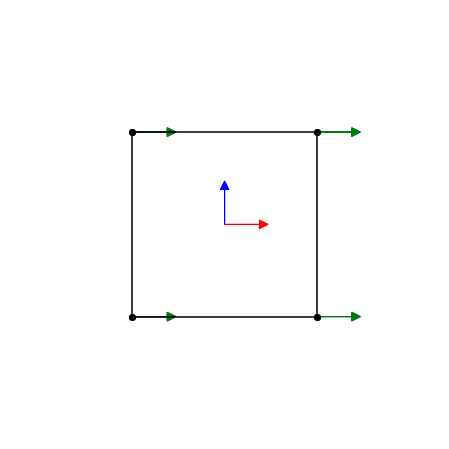

In [86]:
'''
[1]-----[0]
 |       |
 |       |
 |       |
[2]-----[3]
'''

draw_swerve(1, 0, 0)